<a href="https://colab.research.google.com/github/OtsukiTaisuke/Colab/blob/master/NA2_2_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習の流れ（k-NNによる識別）

## モジュールのインポート

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (confusion_matrix, precision_score,
                             recall_score, f1_score)

## 1. データ収集・整理
パッケージ内にある既存のデータセットを利用

In [0]:
iris = load_iris()
X = iris.data
y = iris.target

### 読み込んだデータの情報*




#### type()で型を取得

In [0]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


#### オブジェクト内の属性のリスト

In [0]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [0]:
print(iris.DESCR)

## 2. 前処理
1. 次元削減  
主成分分析を用いる
1. 正規化  
データの平均を0に，分散を1にする

を元データに対しておこなう

### 2-1 PCA

In [0]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

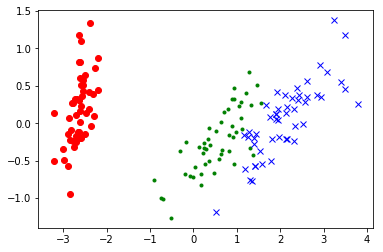

In [0]:
plt.plot(X_pca[y==0,0], X_pca[y==0,1],"ro")
plt.plot(X_pca[y==1,0], X_pca[y==1,1],"g.")
plt.plot(X_pca[y==2,0], X_pca[y==2,1],"bx")

### 2-2 正規化

In [0]:
ss = StandardScaler()
X_pca_ss = ss.fit_transform(X_pca)

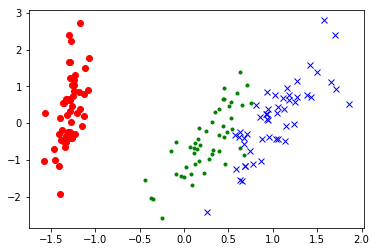

In [0]:
plt.plot(X_pca_ss[y==0,0], X_pca_ss[y==0,1],"ro")
plt.plot(X_pca_ss[y==1,0], X_pca_ss[y==1,1],"g.")
plt.plot(X_pca_ss[y==2,0], X_pca_ss[y==2,1],"bx")

## 3. 評価基準の設定
交差確認法(Cross Validation method)を用いる  
今回は10-fold CV

## 4. 学習
k-NN法  
探索する近傍データ数: 1

In [0]:
clf = KNeighborsClassifier(n_neighbors=1)

In [0]:
scores = cross_val_score(clf, X_pca_ss, y, cv=10)

## 5. 結果の表示

In [0]:
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.94


In [0]:
y_pred = cross_val_predict(clf, X_pca_ss, y, cv=10)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  4, 46]])

In [0]:
recall_score(y, y_pred, average='micro')

0.94

In [0]:
precision_score(y, y_pred, average='micro')

0.94

In [0]:
f1_score(y, y_pred, average='micro')

0.94